    Τμήμα Πληροφορικής και Τηλεπικοινωνιών - Άρτα 
    Πανεπιστήμιο Ιωαννίνων 

    Γκόγκος Χρήστος 
    http://chgogos.github.io/
    
    Τελευταία ενημέρωση: 2/4/2022

# CSV module

Tα CSV (Comma Separated Values) αρχεία είναι αρχεία κειμένου όπου κάθε γραμμή  περιέχει τον ίδιο αριθμό τιμών πεδίων που χωρίζονται μεταξύ τους με κόμμα ή με κάποιο άλλο διαχωριστικό σύμβολο. Ένα αρχείο CSV μπορεί να έχει  στην πρώτη γραμμή του τα ονόματα των πεδίων. Τα CSV αρχεία πολλές φορές προτιμώνται από αρχεία Excel ή από Βάσεις Δεδομένων λόγω της απλότητάς τους και της δυνατότητας ανάγνωσής τους χωρίς ιδιαίτερο λογισμικό.


## Ανάγνωση αρχείων CSV

In [15]:
# Το module csv

import csv

print(dir(csv)) # λειτουργίες που υποστηρίζει το module csv

['Dialect', 'DictReader', 'DictWriter', 'Error', 'QUOTE_ALL', 'QUOTE_MINIMAL', 'QUOTE_NONE', 'QUOTE_NONNUMERIC', 'Sniffer', 'StringIO', '_Dialect', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '__version__', 'excel', 'excel_tab', 'field_size_limit', 'get_dialect', 'list_dialects', 're', 'reader', 'register_dialect', 'unix_dialect', 'unregister_dialect', 'writer']


In [16]:
# Ανάγνωση των περιεχομένων ενός csv αρχείου

import csv

path = "../../../datasets/google_stock_data.csv"
file = open(path, newline='') # διασφάλιση ορθής λειτουργίας σε όλα τα συστήματα (Windows/Linux/MacOS)

reader = csv.reader(file)
header = next(reader)
data = [row for row in reader]
file.close()


print(header)
print(data[0])

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']
['8/19/2014', '585.002622', '587.342658', '584.002627', '586.862643', '978600', '586.862643']


In [17]:
# Ανάγνωση των περιεχομένων ενός csv αρχείου, μετατροπή κάθε τιμής στον κατάλληλο τύπο

import csv
import datetime as dt

path = "../../../datasets/google_stock_data.csv"
file = open(path, newline='')
reader = csv.reader(file)
header = next(reader)
data = []
for row in reader:
    date = dt.datetime.strptime(row[0], '%m/%d/%Y')
    open_price = float(row[1])
    high = float(row[2])
    low = float(row[3])
    close = float(row[4])
    volume = int(row[5])
    adj_close = float(row[6])
    data.append([date, open_price, high, low, close, volume, adj_close])

file.close()
print(data[0])

[datetime.datetime(2014, 8, 19, 0, 0), 585.002622, 587.342658, 584.002627, 586.862643, 978600, 586.862643]


In [18]:
# Ανάγνωση των περιεχομένων ενός csv αρχείου με DictReader (κάθε γραμμή που διαβάζεται τοποθετείται σε ένα λεξικό με κλειδιά τα ονόματα που ορίζονται στην πρώτη γραμμή του csv αρχείου)

import csv
import datetime as dt

path = "../../../datasets/google_stock_data.csv"
file = open(path, newline='')
reader = csv.DictReader(file, delimiter=',')
data = []
for row in reader:
    date = dt.datetime.strptime(row["Date"], '%m/%d/%Y')
    open_price = float(row["Open"])
    high = float(row["High"])
    low = float(row["Low"])
    close = float(row["Close"])
    volume = int(row["Volume"])
    adj_close = float(row["Adj Close"])
    data.append([date, open_price, high, low, close, volume, adj_close])

print(data[0])

[datetime.datetime(2014, 8, 19, 0, 0), 585.002622, 587.342658, 584.002627, 586.862643, 978600, 586.862643]


## Εγγραφή σε αρχεία CSV

In [19]:
# Ανάγνωση από το αρχείο google_stock_data.csv και εγγραφή στο αρχείο google_stock_data_output με τη διαφορά ανάμεσα σε high και low για κάθε ημέρα

path_in = "../../../datasets/google_stock_data.csv"
path_out = "../../../datasets/google_stock_data_output.csv"

file_in = open(path_in, "r", newline='')
file_out = open(path_out, "w", newline='')
reader = csv.reader(file_in)
writer = csv.writer(file_out)
header = next(reader)
writer.writerow(["Date", "High-Low"])
for row in reader:
    line = [row[0], float(row[2])-float(row[3])]
    writer.writerow(line)

file_in.close()
file_out.close()

## Φόρτωση αρχείου csv με το module pandas

In [20]:
# Ανάγνωση αρχείου csv με pandas, εύρεση ελάχιστης και μέγιστης τιμής στήλης, 5 πρώτες εγγραφές του dataframe

import pandas as pd

path = "../../../datasets/google_stock_data.csv"
df = pd.read_csv(path)
print(f'Min={df["Open"].min()} Max={df["Open"].max()}')
df.head()

Min=99.190173 Max=1226.802152


,Date,Open,High,Low,Close,Volume,Adj Close
0,8/19/2014,585.002622,587.342658,584.002627,586.862643,978600,586.862643
1,8/18/2014,576.112580,584.512631,576.002598,582.162619,1284100,582.162619
2,8/15/2014,577.862619,579.382595,570.522603,573.482626,1519100,573.482626
3,8/14/2014,576.182596,577.902645,570.882599,574.652582,985400,574.652582
4,8/13/2014,567.312567,575.002602,565.752564,574.782577,1439200,574.782577


In [21]:
# "Γρήγορα" στατιστικά για τις στήλες του dataframe

df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03,2518.000000
mean,531.307896,536.556826,525.527511,531.053709,9.972915e+06,276.438775
std,207.220666,207.883263,206.235535,207.098828,8.723761e+06,118.297875
min,99.190173,101.740174,95.960165,100.010169,7.900000e+03,49.955130
25%,407.405694,411.748211,401.900699,406.633193,4.463600e+06,203.113483
50%,522.250881,527.430908,516.361597,522.265891,7.097300e+06,261.943505
75%,609.461032,614.991047,603.941036,609.828571,1.276325e+07,312.366913
max,1226.802152,1228.882066,1218.602083,1220.172036,8.254150e+07,609.476541


In [22]:
# γενικές πληροφορίες για το DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2518 non-null   object 
 1   Open       2518 non-null   float64
 2   High       2518 non-null   float64
 3   Low        2518 non-null   float64
 4   Close      2518 non-null   float64
 5   Volume     2518 non-null   int64  
 6   Adj Close  2518 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB


In [24]:
# Τύποι δεδομένων στηλών

df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [25]:
# Μετατροπή δεδομένων στήλης Date σε datetimes 

df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

In [26]:
# 10 τελευταίες εγγραφές του dataframe

df.tail(10)

,Date,Open,High,Low,Close,Volume,Adj Close
2508,2004-09-01,102.700174,102.970180,99.670169,100.250171,9181600,50.075011
2509,2004-08-31,102.300173,103.710180,102.160177,102.370175,4941200,51.133953
2510,2004-08-30,105.280178,105.490184,102.010172,102.010172,5221400,50.954132
2511,2004-08-27,108.100185,108.620186,105.690180,106.150181,6241200,53.022069
2512,2004-08-26,104.950180,107.950188,104.660179,107.910182,7128600,53.901190
2513,2004-08-25,104.960181,108.000187,103.880180,106.000184,9232100,52.947145
2514,2004-08-24,111.240189,111.600192,103.570177,104.870176,15319700,52.382705
2515,2004-08-23,110.750191,113.480193,109.050183,109.400185,18342800,54.645447
2516,2004-08-20,101.010175,109.080187,100.500174,108.310183,22942800,54.100990
2517,2004-08-19,100.000168,104.060182,95.960165,100.340176,44871300,50.119968


In [31]:
# υπολογισμός correlation στηλών

print(df.corr())

               Open      High       Low     Close    Volume  Adj Close
Open       1.000000  0.999732  0.999586  0.999312 -0.487315   0.886172
High       0.999732  1.000000  0.999543  0.999653 -0.483683   0.885976
Low        0.999586  0.999543  1.000000  0.999714 -0.494183   0.886430
Close      0.999312  0.999653  0.999714  1.000000 -0.489259   0.886602
Volume    -0.487315 -0.483683 -0.494183 -0.489259  1.000000  -0.515167
Adj Close  0.886172  0.885976  0.886430  0.886602 -0.515167   1.000000


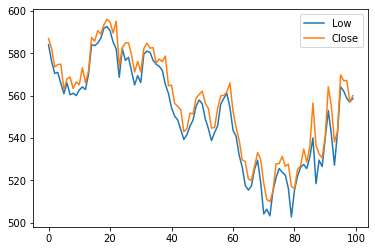

In [28]:
# γρήγορο γράφημα πάνω στο dataframe

import matplotlib.pyplot as plt

df[['Low','Close']][0:100].plot()
plt.show()

### Αποθήκευση pandas DataFrame ως csv

In [ ]:
# df[['Low','Close']].to_csv()